# Prática 3 - Exploração de Dados - Parte 3

#Nome: Ricardo França Fernandes do Vale     No. USP: 9293477

Nesta prática, ocorrerá uma exploração de dados baseada nos atributos numéricos dos datasets, em que se desejerá observar medidas estatísticas no âmbito da análise exploratória multivariada, em que observaremos histogramas, gráficos de espalhamento, análises de covariância e correlação, entre outros métodos estatísticos de uso amplo na literatura. Crê-se que nesta prática haverá uma confirmação mais sólida diante das hipóteses formuladas nas práticas anteriores.

## Dataset 1 - Boston Housing

### 1. Recapitulando as perguntas iniciais:

Podemos pontuar as hipóteses feitas anteriormente:

* Quanto menor a taxa de crime (CRIM), maior a incidência de professores de ensino básico (PTRATIO)?
* Quanto mais perto de centros de emprego (DIS), maior o preço das casas habitadas (MEDV)?
* Quanto menor a incidência de comércio/empresas (maior o ZN), menor o preço das casas habitadas (MEDV)?

A análise exploratória da prática passada não auxiliou para inferir diante das hipóteses, porém, auxiliou a gerar uma escolha melhor de atributos, já que dois deles tinham muitos outliers, sendo assim, dados prejudiciais para a análise. Portanto, plotando pelo boxplot, foram encontrados dois atributos para substituir ZN e CRIM.

Primeiramente, será carregado o dataset:

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

data = load_boston()
boston = pd.DataFrame(data=np.c_[data['data'], data['target']], 
                          columns=np.r_[data['feature_names'], ['target']])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Sendo assim, foram plotados outros boxplots para verificar atributos melhores para a análise exploratória e o comportamento de INDUS e RAD mostrou-se satisfatório para esta mudança. Abaixo encontra-se o código e a figura dos gráficos.

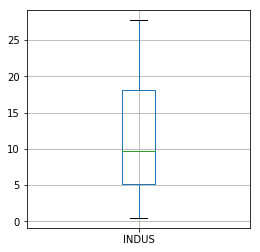

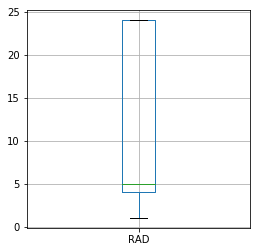

In [23]:
boston.boxplot(column=boston.columns[[2]].tolist(),figsize=(4,4))
plt.show()

boston.boxplot(column=boston.columns[[8]].tolist(),figsize=(4,4))
plt.show()

Portanto, o refinamento de atributos para 5 dimensões será mantido. Dessa forma, serão usados apenas os atributos:
* RAD (índice de acessabilidade a rodovias radiais); 
* INDUS (proporção de espaços industriais por área em acres); 
* NOX (concentração de óxido nítrico, que configura poluição); 
* DIS (distância ponderada dos centros de emprego na cidade); 
* PTRATIO (índice de professores de ensino básico na região de interesse);
* E a classe MEDV, que é o valor mediano das casas habitadas na região de interesse.

Sendo assim, as perguntas foram reformuladas:
* A proporção alta de indústrias em uma região da cidade torna a região menos populadas por professores?
* Quanto mais perto a região estiver de centros de emprego, maior o preço das casas habitadas?
* Quanto maior a proporção de indústrias na região, maior o nível de poluição?

### 2. Histogramas

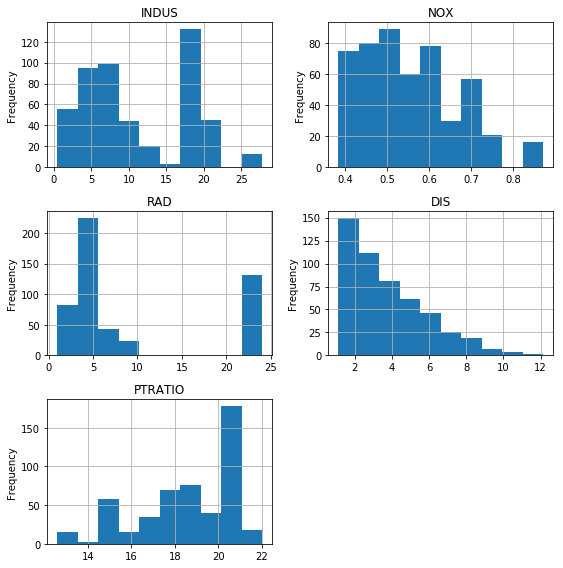

In [47]:
#cópia reduzida do dataset com os atributos selecionados
data = boston[['INDUS','NOX', 'RAD', 'DIS','PTRATIO','target']].copy()

columns = data.columns.tolist()
plt.figure(figsize=(8, 8))
for col in range(1,6):
    ax = plt.subplot(3, 2, col)
    data.iloc[:, col-1].plot.hist(bins=10, grid=True)
    ax.set_title(columns[col-1])

plt.tight_layout()
plt.show()

#### Respondendo questões sobre o histograma

Primeiramente, é necessário ressaltar que, pelo fato do conjunto de dados ter uma classe munida de valores contínuos, o plot de histograma da frequência de atributo por classe não foi feito. 
O valor final para bins é exibido acima, definido como bins=10. A escolha se baseou por análise experimental e pelo fato de que essa configuração mostra de maneira correta a distribuição dos dados sem muitas distorções. O valor mínimo de 30 unidades experimentais por bin não é garantido; mas este é o problema de analisar uma base de dados "pequena" (a base possui entre 500 e 600 registros).
    
Comparando histograma e boxplot, o histograma tem como intuito observar a distribuição dos dados analisados, demonstrando a importância da escolha dos bins; tendo em vista que se houvesse a possibilidade de distribuição normal univariada (que poderia ser descoberta pelo histograma), facilitaria os métodos estatísticos a serem usados. Em contraposição, o boxplot é baseado nas medidas de centralidade e tenta analisar o espalhamento dos dados sob esta ótica.
    
É interessante pontuar a comparação dos boxplots de INDUS e RAD com seus histogramas: ambos possuem nenhum outlier pontuado pelo boxplot, porém, bins sem unidades experimentais compatíveis, ou seja, faixa de valores sem frequência; o que poderia indicar, se apenas o histograma fosse analisado, a presença de outliers.
Diante dos histogramas dos atributos analisados, nenhum aparenta ter distribuição normal univariada; porém, uma observação importante a ser coletada desses gráficos é o fato de DIS (que representa a distância da região a centros de emprego, possui um gráfico semelhante ao que se espera de uma variável com obliquidade de simetria positiva (maior quantidade de valores nos dois primeiros quartis).

### 3. Análise Multivariada - Covariância e Correlação

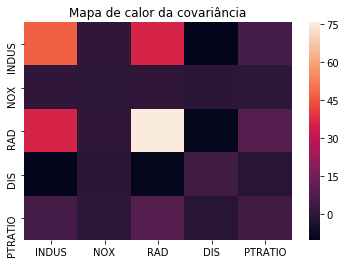

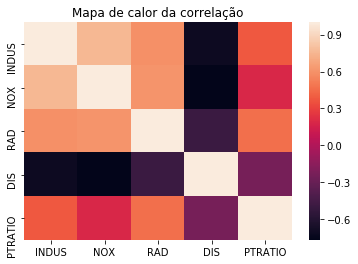

In [59]:
#Mapa de calor da covariância dos atributos
cov = data.iloc[:,0:5].cov()

axis1 = plt.axes()
sns.heatmap(cov, ax=axis1)
axis1.set_title('Mapa de calor da covariância')
plt.show()

#Mapa de calor da covariância dos atributos
correlation = data.iloc[:,0:5].corr()

axis2 = plt.axes()
sns.heatmap(correlation, ax=axis2)
axis2.set_title('Mapa de calor da correlação')

plt.show()


#### Respondendo perguntas sobre covariância e correlação

- No caso, qual das duas é mais informativa?
    
    Pelo fato dos atributos possuírem unidades de medida diferentes, com DIS e RAD apresentando valor absoluto, ou seja, uma distância, e PTRATIO, NOX e INDUS representando proporções, a correlação é mais importante para a avaliação das hipóteses, pois desconsidera a magnitude (consequentemente, a unidade de medida) dos dados.



- Qual a diferença entre as duas e quando é mais indicado utilizar uma ao invés da outra? De que forma elas ajudam, se é que ajudam, a responder suas perguntas?

     A correlação é mais recomendada quando se deseja observar relações **lineares** entre atributos, com o ponto positivo de permitir a análise independente de unidade de medida. Por sua vez, a covariância observa relação entre os valores dos atributos, medindo o grau com o qual dois atributos variam junto, também **linearmente**.
     No caso, devido à falta de uniformidade diante da magnitude dos dados das variáveis escolhidas para este dataset, é mais pertinente analisar a **correlação** de pares de variáveis; no entanto, isto não é o suficiente para concluir sobre relações entre variáveis, pois tal medida estatística parte do pressuposto de que as relações bivariadas são lineares, algo que nem sempre pode acontecer. A linearidade de duas variáveis pode ser enxergada pelo método do gráfico de dispersão, que será testado na próxima seção.

### 4. Gráfico de Dispersão

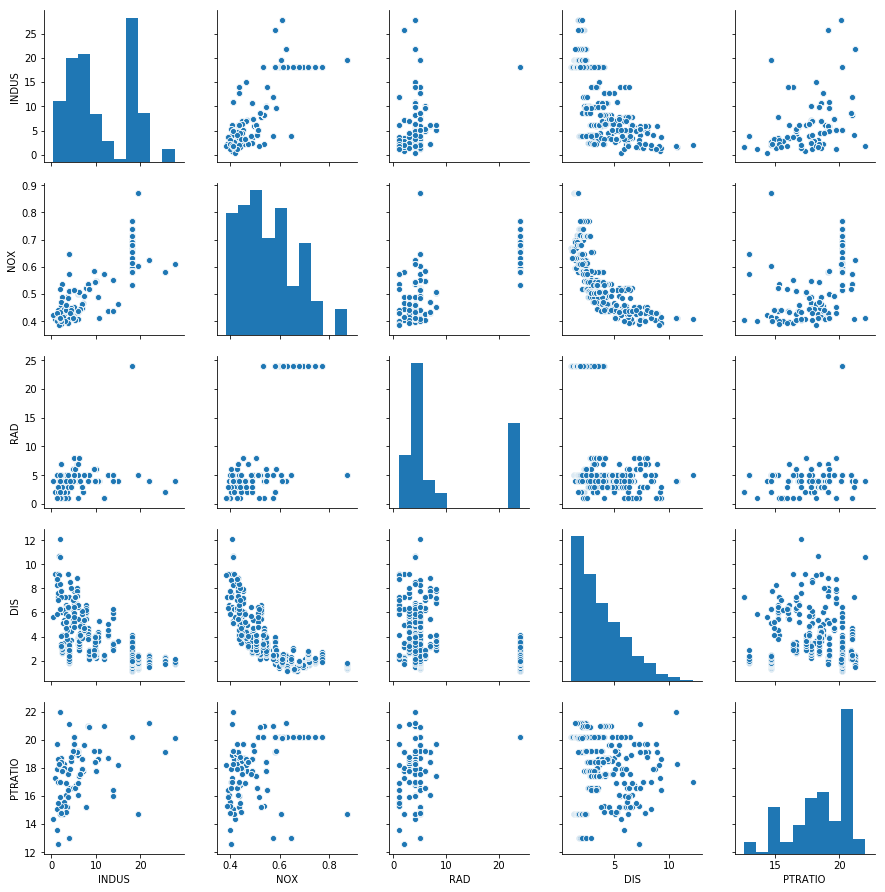

In [69]:
sns.pairplot(data=data, vars=columns[:-1])
plt.show()

### 5. Análise dos gráficos de dispersão

- Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e outliers?

   Com os gráficos de dispersão é possível observar de maneira visual a relação bivariada entre unidades experimentais, onde pode-se, inclusive, conferir se há linearidade na relação ou não. No caso, o que pode ser observado nos gráficos de dispersão acima é uma grande quantidade de atributos com relação bivariada parcialmente correlata.
   
   É possível observar, também que, os gráficos da parte triangular superior são versões transpostas dos gráficos da parte triangular inferior da matriz de scatter plots.
   
   Dentre as correlações a serem observadas, podem ser destacadas:
   - A correlação próxima de -1 entre NOX e DIS, e entre DIS e INDUS pode ser confirmada pelos gráficos de dispersão, mesmo que existam leves desvios por alguns valores. Isso indica proporção inversa entre as variáveis, respectivamente em cada par;
   - Mesmo com RAD tendo correlações com as outras variávies entre 0.6 e 0.9, os gráficos de dispersão assemelham-se a retas, indicando um comportamento estranho;
   - Correlações que podem indicar independência, ou seja, próximas ou iguais a 0, como no caso de NOX e PTRATIO e  DIS e PTRATIO. Tais correlações possuem gráfico análogo ao de falta de relação linear entre pares de variáveis. Além disso, é interessante notar que na relação entre NOX e PTRATIO, é possível enxergar uma "linha reta", que pode conter alguns outliers. A relação entre DIS e PTRATIO apresenta um gráfico mais próximo ao gráfico ideal de correlação 0, estas variáveis tem grande chance de serem independentes;
   - Existem outros gráficos com outliers "em linha reta", dessa vez, indicando correlação próxima a 1, que é o caso de NOX e INDUS. A outra correlação próxima de 1 é entre NOX e RAD, dessa vez, sem outliers. Ambos os valores de correlação podem ter a indicação de proporção direta confirmadas pela proximidade do gráfico a uma relação linear. 




### 6. Conclusão

Serão reavaliadas as hipóteses levantadas no início do experimento.

* A proporção alta de indústrias em uma região da cidade torna a região menos populadas por professores?

**Hipótese reformulada**: Como há um valor alto de correlação entre as variáveis de proporção de indústrias na região (INDUS) e taxa de professores na região (PTRATIO), mas graficamente, não há muita semelhança de um gráfico de correlação linear próxima a 1. Então, analisando as correlações, por valores e graficamente, *é mais seguro, reformular a hipótese para tentar provar que quanto maior o acesso a rodovias radiais, maior o número de insútrias na região.*

* Quanto mais perto a região estiver de centros de emprego, maior o preço das casas habitadas?

**Hipótese inconsistente à análise**: Não é possível realizar correlação de variável com target. No entanto, uma possível reformulação dada a variável DIS (distância ponderada da região a centros de empregos), seria analisar *se a distância a centros de emprego possui uma maior concentração de indústrias*.

* Quanto maior a proporção de indústrias na região, maior o nível de poluição?

**Hipótese confirmada**: Conforme analisado na seção anterior, é clara a existência de uma correlação linear de proporção direta entre INDUS e NOX, podendo não rejeitar tal hipótese.


## Dataset 2 - Agro

### 1. Recapitulando as perguntas iniciais:

Podemos pontuar as hipóteses feitas anteriormente:

* Plantios onde há uma incidência maior de chuvas podem ter maior incidência de falhas
* Assim como, plantios onde há uma incidência menor de chuvas podem podem ter maior incidência de falhas
* Plantios com maior resistência de solo tem menor incidência de falhas

Para esta análise, independente da avaliação do boxplot, que indicou muitos outliers nas medidas diretas, serão usados os mesmos atributos das outras práticas. Os dois últimos atributos são obtidos por transformação de dados.

* O percentual de falhas (percFalha); 
* A duração do solo perante a chuvas, entendido como a resistência do mesmo diante de ausência de umidade (duracaoChuvaSolo); 
* A área de plantio (areaPlantio); 
* Uma média anual de chuvas (chuva); 
* Uma média anual de radiação solar (radSolar). 

As hipótese serão mantidas. Abaixo será carregado o dataset:

In [74]:
dataset = pd.read_csv(
        './falhas_plantio_hashing.csv', 
        sep=';', header=0, encoding='latin1')
dataset.head()

,Unnamed: 0,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
0,1,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,13.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,23.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
4,5,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,c01f179e4b57ab8bd9de309e6d576c48,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,7.36,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1


Abaixo é obitda uma cópia do dataset onde estão apenas os atributos de interesse:

In [76]:
percFalha = pd.Series(dataset.Perc_Falha.apply(pd.to_numeric, errors='coerce'))
duracaoChuvaSolo = dataset.Duracao_Chuva_Solo.apply(pd.to_numeric, errors='coerce')
areaPlantio = dataset.Area_Plantio.apply(pd.to_numeric, errors='coerce')
radSolar = pd.Series(dataset[['Rad_Solar_MJm2_April', 'Rad_Solar_MJm2_August', 'Rad_Solar_MJm2_December', 'Rad_Solar_MJm2_February', 'Rad_Solar_MJm2_January', 'Rad_Solar_MJm2_July', 'Rad_Solar_MJm2_June', 'Rad_Solar_MJm2_March', 'Rad_Solar_MJm2_May', 'Rad_Solar_MJm2_November', 'Rad_Solar_MJm2_October', 'Rad_Solar_MJm2_September']].apply(pd.to_numeric, errors='coerce').mean(axis=1))
chuva = pd.Series(dataset[['Chuva_April', 'Chuva_August', 'Chuva_December', 'Chuva_February', 'Chuva_January', 'Chuva_July', 'Chuva_June', 'Chuva_March', 'Chuva_May', 'Chuva_November', 'Chuva_October', 'Chuva_September']].apply(pd.to_numeric, errors='coerce').mean(axis=1))

#Dessa vez, os atributos serão selecionados, formando uma cópia reduzida do dataset
agro = pd.concat([percFalha,dataset[['Duracao_Chuva_Solo']],dataset[['Area_Plantio']], radSolar, chuva], axis=1).copy()
agro = agro.dropna()

### 2. Histogramas

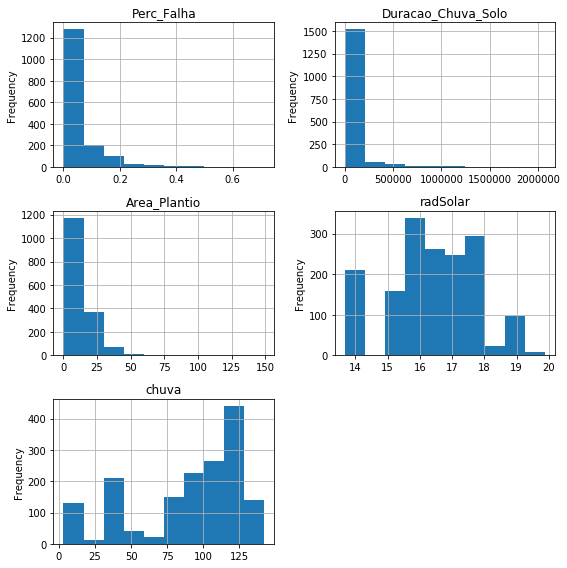

In [84]:
columns = agro.columns.tolist()
plt.figure(figsize=(8, 8))
for col in range(1,6):
    ax = plt.subplot(3, 2, col)
    agro.iloc[:, col-1].plot.hist(bins=10, grid=True)
    if (col == 4):
        ax.set_title('radSolar')
    elif (col == 5):
        ax.set_title('chuva')
    else:
        ax.set_title(columns[col-1])

plt.tight_layout()
plt.show()

#### Respondendo questões sobre o histograma
 
O valor final para bins é exibido acima, definido como bins=10. A escolha se baseou por análise experimental e pelo fato de que com bins menores, havia algomeração de frequências e com bins maiores, as frequências se espalhavam de forma a deixar bins vazias. Como é um dataset com número grande de unidades experimentais, fica difícil de observar se o número mínimo por bin foi atingido.
    
Comparando histograma e boxplot, o histograma tem como intuito observar a distribuição dos dados analisados e o boxplot é baseado nas medidas de centralidade e tenta analisar o espalhamento dos dados sob esta ótica. Já foi observado na última prática que, para validar as hipóteses levantadas, o boxplot não é tão útil; em compensação, os histogramas podem revelar informações interessantes sobre as distribuições das variáveis.
    
Diante dos histogramas dos atributos analisados, apenas os dados que foram obtidos através de transformação tem leves similaridades à distribuição normal univariada. Enquanto os dados originais (percentual de falhas, área de plantio e duração de chuvas no solo) obtiveram obliquidade positiva, demonstrando falta de simetria nos dados, indicando que muitos dados podem estar nos dois primeiros quantis. É interesante observar que os três histogramas assemelham-se bastante à distribuição qui-quadrado, podendo dar margem a análises estatísticas mais aprofundadas.

### 3. Análise multivariada - covariância e correlação

                    Perc_Falha  Duracao_Chuva_Solo   Area_Plantio  \
Perc_Falha            0.005957       -2.642376e+02      -0.053342   
Duracao_Chuva_Solo -264.237619        2.981776e+10  193886.591506   
Area_Plantio         -0.053342        1.938866e+05     143.616288   
0                     0.006320        8.104220e+03       2.024544   
1                     0.306340        4.789654e+05      36.853690   

                              0              1  
Perc_Falha             0.006320       0.306340  
Duracao_Chuva_Solo  8104.220373  478965.435581  
Area_Plantio           2.024544      36.853690  
0                      1.936846       8.080023  
1                      8.080023    1664.744025  


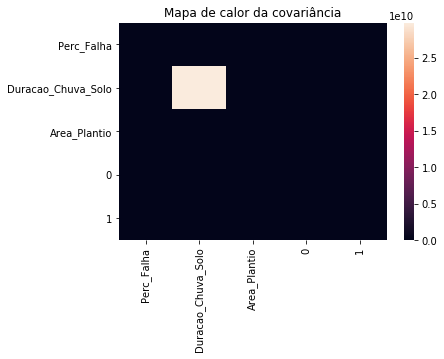

                    Perc_Falha  Duracao_Chuva_Solo  Area_Plantio         0  \
Perc_Falha            1.000000           -0.019826     -0.057669  0.058831   
Duracao_Chuva_Solo   -0.019826            1.000000      0.093693  0.033723   
Area_Plantio         -0.057669            0.093693      1.000000  0.121389   
0                     0.058831            0.033723      0.121389  1.000000   
1                     0.097275            0.067982      0.075371  0.142296   

                           1  
Perc_Falha          0.097275  
Duracao_Chuva_Solo  0.067982  
Area_Plantio        0.075371  
0                   0.142296  
1                   1.000000  


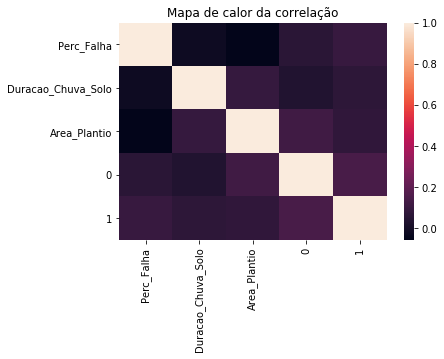

In [91]:
#Mapa de calor da covariância dos atributos
cov = agro.iloc[:,0:5].cov()
print(cov)
axis1 = plt.axes()
sns.heatmap(cov, ax=axis1)
axis1.set_title('Mapa de calor da covariância')
plt.show()

#Mapa de calor da covariância dos atributos
correlation = agro.iloc[:,0:5].corr()
print(correlation)
axis2 = plt.axes()
sns.heatmap(correlation, ax=axis2)
axis2.set_title('Mapa de calor da correlação')

plt.show()

Lembrando que 0 representa a média de radiação solar no ano (radSolar) e 1 representa a média de chuvas (chuva).

#### Respondendo perguntas sobre covariância e correlação

- No caso, qual das duas é mais informativa?
    
    Pelo fato dos atributos possuírem unidades de medida diferentes, com percFalha representando porcentagem no valor multiplicado por 100, areaPlantio expressa em unidade de área, medida de chuva expressa em unidades de medição de índices pluviométricos, além dos outros dois atributos, a correlação é mais importante para a avaliação das hipóteses, pois desconsidera a magnitude (consequentemente, a unidade de medida) dos dados.
    Foi necessário, inclusive, exibir os valores das covariâncias, tendo em vista que o heatmap não conseguia exibir corretamente a disposição dos valores devido à variância exorbitante de DuracaoChuvaSolo.


- Qual a diferença entre as duas e quando é mais indicado utilizar uma ao invés da outra? De que forma elas ajudam, se é que ajudam, a responder suas perguntas?

     A correlação é mais recomendada quando se deseja observar relações **lineares** entre atributos, com o ponto positivo de permitir a análise independente de unidade de medida. Por sua vez, a covariância observa relação entre os valores dos atributos, medindo o grau com o qual dois atributos variam junto, também **linearmente**.
     No caso, devido à falta de uniformidade diante da magnitude dos dados das variáveis escolhidas para este dataset, é mais pertinente analisar a **correlação** de pares de variáveis, assim como no dataset sobre preços de casas em Bosotn.

### 4. Gráficos de dispersão

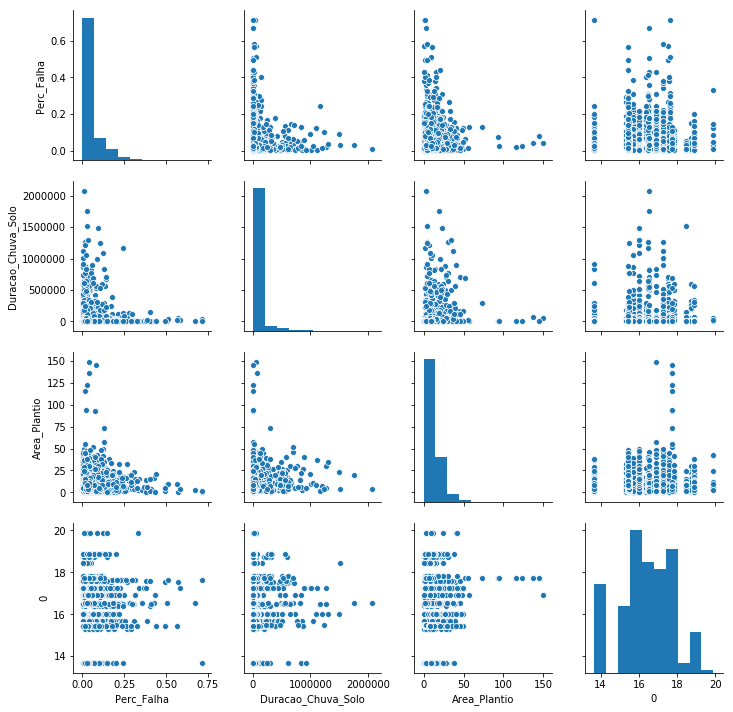

In [89]:
sns.pairplot(data=agro, vars=columns[:-1])
plt.show()

### 5. Análise dos gráficos de dispersão

- Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e outliers?

   Com os gráficos de dispersão é possível observar de maneira visual a relação bivariada entre unidades experimentais, onde pode-se, inclusive, conferir se há linearidade na relação ou não. No caso, o que pode ser observado nos gráficos de dispersão acima é uma grande quantidade de atributos sem correlação linear alguma. A maior correlação linear, em módulo, é entre 0.2 e 0.3 entre os atributos AreaPlantio e DuracaoChuvaSolo. Além disso, as demais correlações lineares próximas a 0.3 são pertencentes a atributos obtidos por transformação de dados.
   
   É possível observar, também que, os gráficos da parte triangular superior são versões transpostas dos gráficos da parte triangular inferior da matriz de scatter plots.

### 6. Conclusão

Após as análises de dispersão, de histograma e de medidas estatísticas é possível concluir que a escolha dos atributos é inválida e deve ser reformulada, o que remodelaria as questões direcionadas à base. Isso se deve ao fato de que as correlações lineares entre os atributos, em pares, indicam proximidade à independência, ou seja, não existe relação qualquer entre os valores.